In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('flight_delays 1.csv', header = 0, sep=',')

In [3]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [4]:
def do_norm_table():
    df['Month']= df['Month'].apply(lambda x: x.split('-')[1])
    df['Month'] = df['Month'].astype(int)
    df['DayofMonth'] = df['DayofMonth'].apply(lambda x: x.split('-')[1])
    df['DayofMonth'] = df['DayofMonth'].astype(int)
    df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: x.split('-')[1])
    df['DayOfWeek'] = df['DayOfWeek'].astype(int)

In [5]:
do_norm_table()
def no_yes(val):
    if 'Y' in val:
        return 1
    else:
        return 0
df['dep_delayed_15min'] = df['dep_delayed_15min'].apply(lambda x: no_yes(x))

In [6]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null int32
DayofMonth           100000 non-null int32
DayOfWeek            100000 non-null int32
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null int64
dtypes: int32(3), int64(3), object(3)
memory usage: 5.7+ MB


In [8]:
df['UniqueCarrier'].value_counts()

WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: UniqueCarrier, dtype: int64

In [9]:
# df[df['dep_delayed_15min'] == 'Y'] = df[df['dep_delayed_15min'] == 0]
# df['dep_delayed_15min'] = df['dep_delayed_15min'].fillna(1)
# df[df['dep_delayed_15min'] == 'N'] = df[df['dep_delayed_15min'] == 0]
# df['dep_delayed_15min'] = df['dep_delayed_15min'].fillna(0)

In [10]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [11]:
x = df['dep_delayed_15min'].value_counts()
y = df['dep_delayed_15min']

In [12]:
#sns.pairplot(df)

In [13]:
#sns.distplot(df["Month"],kde=False,bins=25)

In [14]:
#sns.jointplot(x="Month",y="dep_delayed_15min",data=df,kind="hex")

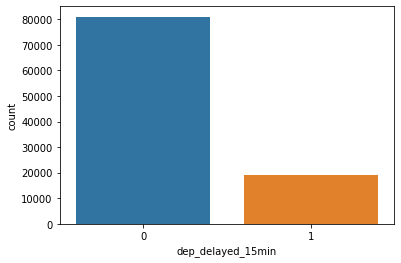

In [15]:
sns.countplot(x="dep_delayed_15min",data=df)

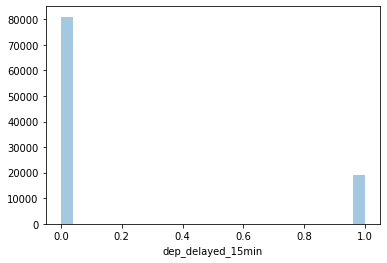

In [16]:
sns.distplot(df['dep_delayed_15min'],kde=False,bins=25)

In [17]:
df.corr()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min
Month,1.000000,0.007106,0.004717,-0.001544,0.006853,0.016998
DayofMonth,0.007106,1.000000,-0.015537,0.001116,0.001510,0.025842
DayOfWeek,0.004717,-0.015537,1.000000,0.009392,0.011937,0.010439
DepTime,-0.001544,0.001116,0.009392,1.000000,-0.020681,0.243819
Distance,0.006853,0.001510,0.011937,-0.020681,1.000000,-0.002734
dep_delayed_15min,0.016998,0.025842,0.010439,0.243819,-0.002734,1.000000


In [18]:
#sns.heatmap(df.corr())

In [19]:
#plt.plot(df['dep_delayed_15min'],df['Month'])

In [20]:
Y = df['dep_delayed_15min']

In [21]:
X = df[['Month','DayofMonth','DayOfWeek','Distance']]

In [22]:
model = LinearRegression()

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [24]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.coef_

array([ 2.14922061e-03,  1.19071382e-03,  2.04309821e-03, -1.36414872e-06])

In [26]:
metrics.mean_absolute_error(model.predict(X_test),Y_test)

0.30838841913185266

In [27]:
metrics.mean_squared_error(model.predict(X_test),Y_test)

0.15460068374982938

In [28]:
metrics.mean_squared_log_error(model.predict(X_test),Y_test)

0.07599982827764062

In [29]:
metrics.r2_score(model.predict(X_test),Y_test)

-859.9786468334385

In [30]:
model.predict(X_test)

array([0.20302299, 0.17607536, 0.1838426 , ..., 0.19546622, 0.18517038,
       0.20092073])

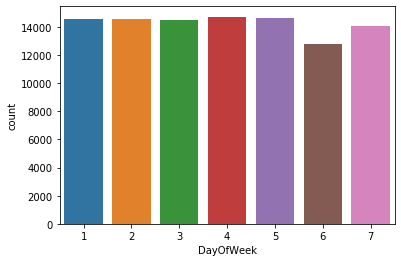

In [31]:
sns.countplot(x="DayOfWeek",data=df)

In [ ]:
plt.hist(X)